# Trabalho Ac2

## Bibliotecas utilizadas

In [4]:
import pandas as pd
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import IPython.display as ipd
import tensorflow as tf
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


#### Aqui temos o dataset sem qualquer alteração.

In [5]:
df = pd.read_csv('C:/Users/zezam/OneDrive/Ambiente de Trabalho/trabalhoac2/TrabalhoACII/UrbanSound8K.csv')


df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


#### Aqui optamos por fazer uma lista com as labels de modo a posteriormente utilizarmos para fazer o training e test set

In [6]:
for coluna in df.columns:
    i=coluna
    labels = df[i].tolist()
    print(coluna)
print(labels)

slice_file_name
fsID
start
end
salience
fold
classID
class
['dog_bark', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'air_conditioner', 'dog_bark', 'dog_bark',

### Distribuição das classes

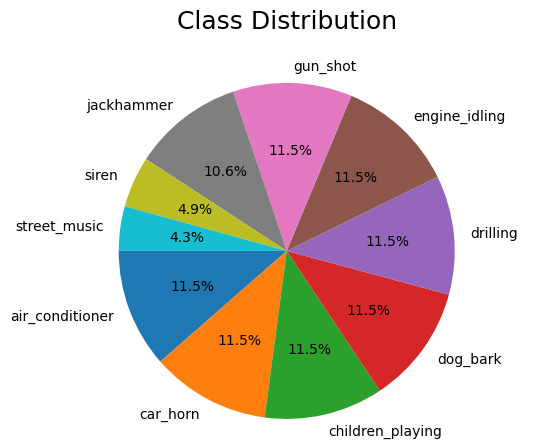

In [7]:
class_dict = df['class'].value_counts(normalize=True)
classes = list(np.unique(df['class']))
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08, fontsize=18)
ax.pie(class_dict, labels=classes, autopct='%1.1f%%', shadow=False, startangle=180)
ax.axis('equal')
plt.savefig("distribution_class")
plt.show(block=False)

### Função para padronizar o aúdio de modo a todos terem 4 segundos

In [8]:
# Função para comprimir ou estender o áudio para 4 segundos
def adjust_audio_duration(audio_path, target_duration=4.0):
    y, sr = librosa.load(audio_path, sr=None)  # Carrega o arquivo de áudio

    # Calcula a duração atual do áudio
    current_duration = librosa.get_duration(y=y, sr=sr)

    # Se a duração atual for menor que a meta, estende o áudio com zeros
    if current_duration < target_duration:
        y_adjusted = np.pad(y, (0, int((target_duration - current_duration) * sr)), 'constant')
    # Se a duração atual for maior que a meta, corta o áudio
    else:
        y_adjusted = y[:int(target_duration * sr)]

    return y_adjusted, sr

In [9]:
audio_folder = 'C:/Users/zezam/OneDrive/Ambiente de Trabalho/trabalhoac2/TrabalhoACII/audio/fold1'

# Lista o conteúdo do diretório
audio_folder2 = os.listdir(audio_folder)

# Ordena os arquivos por número de forma ascendente
sorted_files = sorted(audio_folder2, key=lambda x: int(''.join(filter(str.isdigit, x))) if any(c.isdigit() for c in x) else float('inf'))
count=0
for item in sorted_files:
    print(item)
    count+=1
print(count)

7061-6-0-0.wav
7383-3-0-0.wav
7383-3-0-1.wav
7383-3-1-0.wav
9031-3-1-0.wav
9031-3-2-0.wav
9031-3-3-0.wav
9031-3-4-0.wav
14113-4-0-0.wav
14113-4-0-1.wav
15564-2-0-0.wav
15564-2-0-1.wav
15564-2-0-2.wav
17592-5-0-0.wav
17592-5-1-0.wav
17592-5-1-1.wav
17592-5-1-2.wav
17592-5-1-3.wav
17913-4-0-0.wav
17913-4-0-1.wav
17913-4-0-2.wav
17913-4-1-0.wav
17913-4-2-0.wav
19026-1-0-0.wav
21684-9-0-5.wav
21684-9-0-7.wav
22962-4-0-0.wav
22962-4-0-1.wav
22962-4-0-2.wav
24074-1-0-0.wav
24074-1-0-1.wav
24074-1-0-2.wav
24074-1-0-3.wav
24074-1-0-4.wav
24074-1-0-5.wav
24074-1-0-6.wav
24074-1-0-7.wav
24074-1-0-8.wav
24074-1-0-9.wav
26270-9-0-3.wav
30823-8-0-0.wav
31323-3-0-1.wav
31323-3-0-2.wav
31840-3-0-0.wav
31840-3-1-0.wav
40722-8-0-0.wav
40722-8-0-1.wav
40722-8-0-2.wav
40722-8-0-3.wav
40722-8-0-4.wav
40722-8-0-5.wav
40722-8-0-6.wav
40722-8-0-7.wav
40722-8-0-8.wav
43786-3-0-0.wav
43786-3-1-0.wav
43806-8-0-0.wav
44736-5-0-0.wav
44736-5-0-1.wav
46654-6-0-0.wav
46656-6-0-0.wav
46656-6-1-0.wav
46656-6-2-0.wav


### Impressão de alguns espectrogramas de modo a verificar se todos os aúdios têm 4 segundos

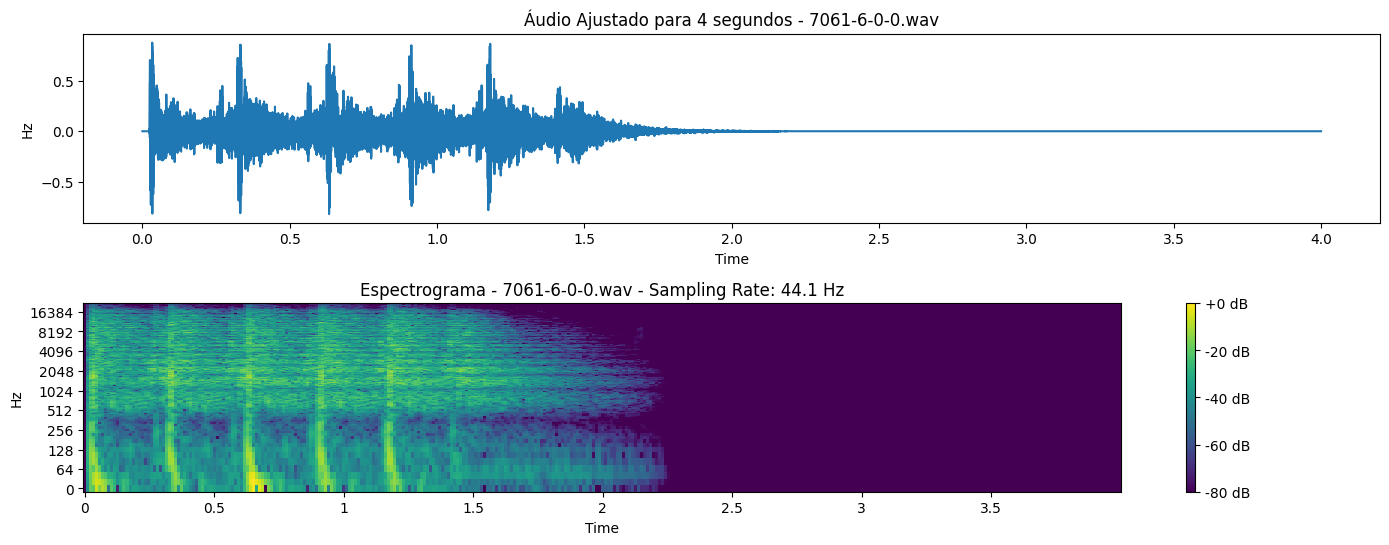

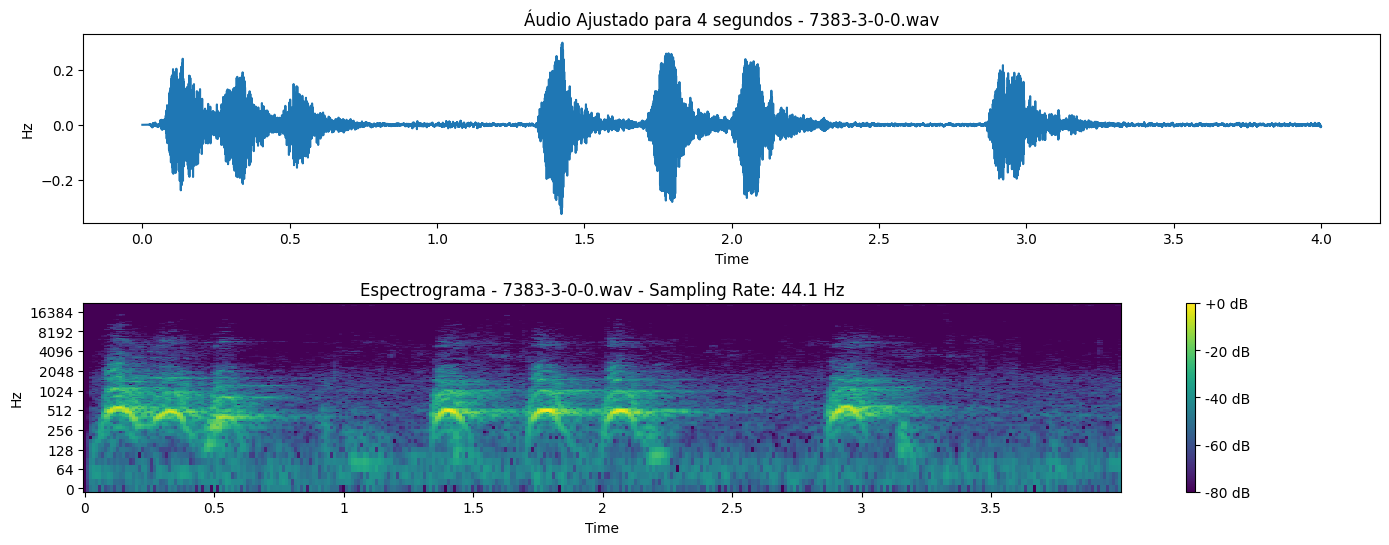

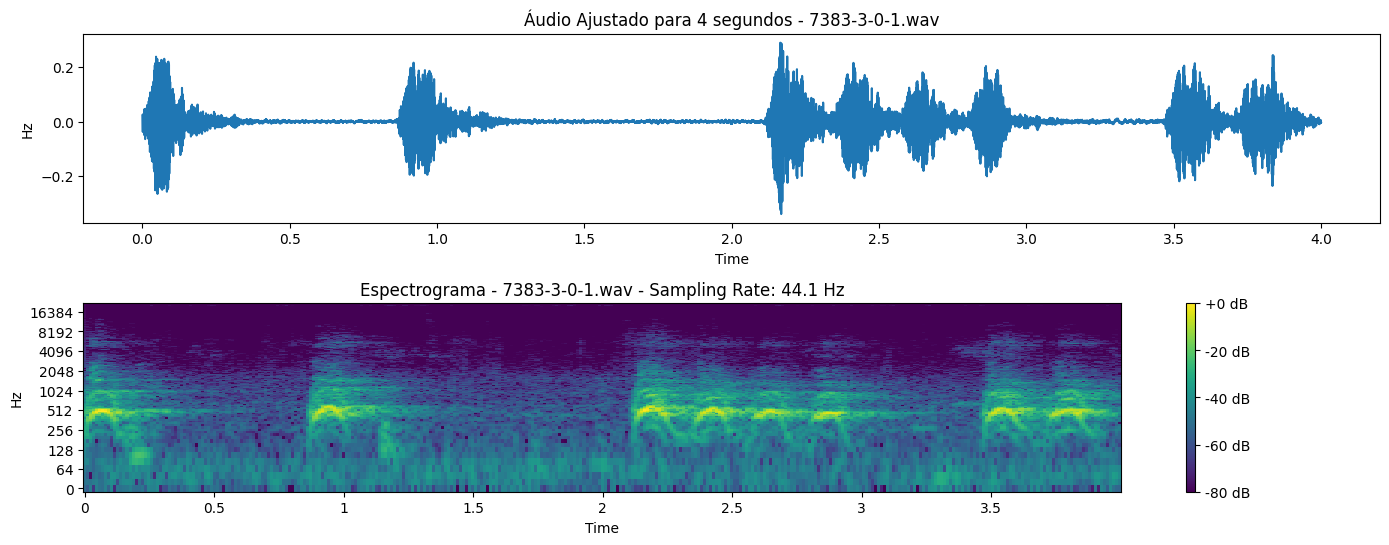

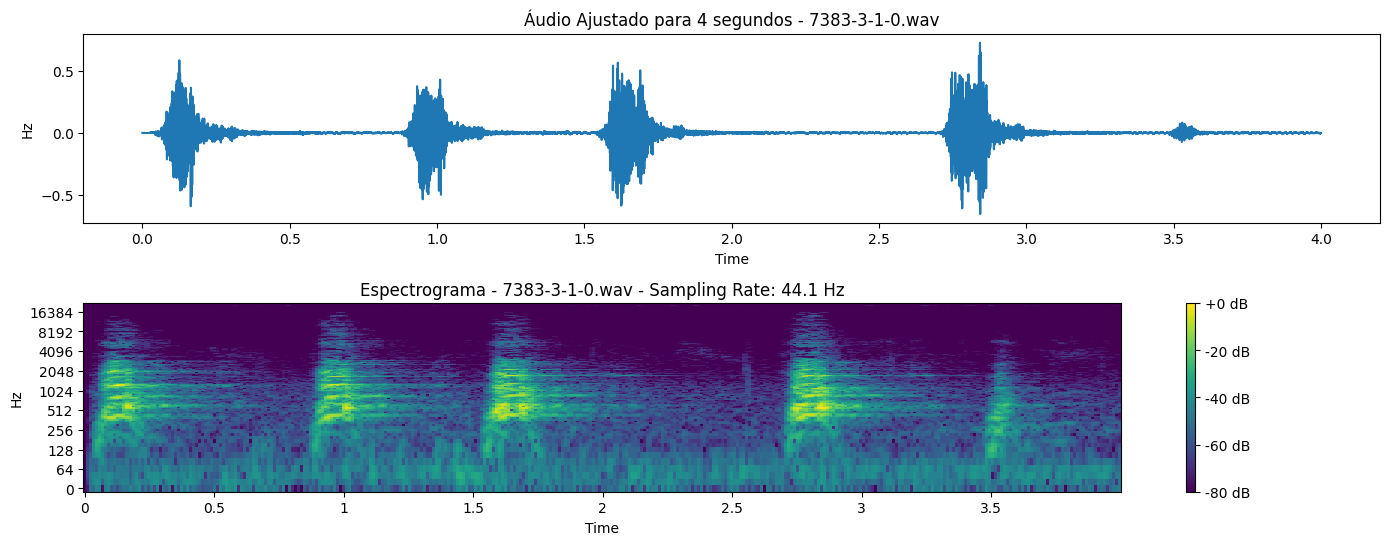

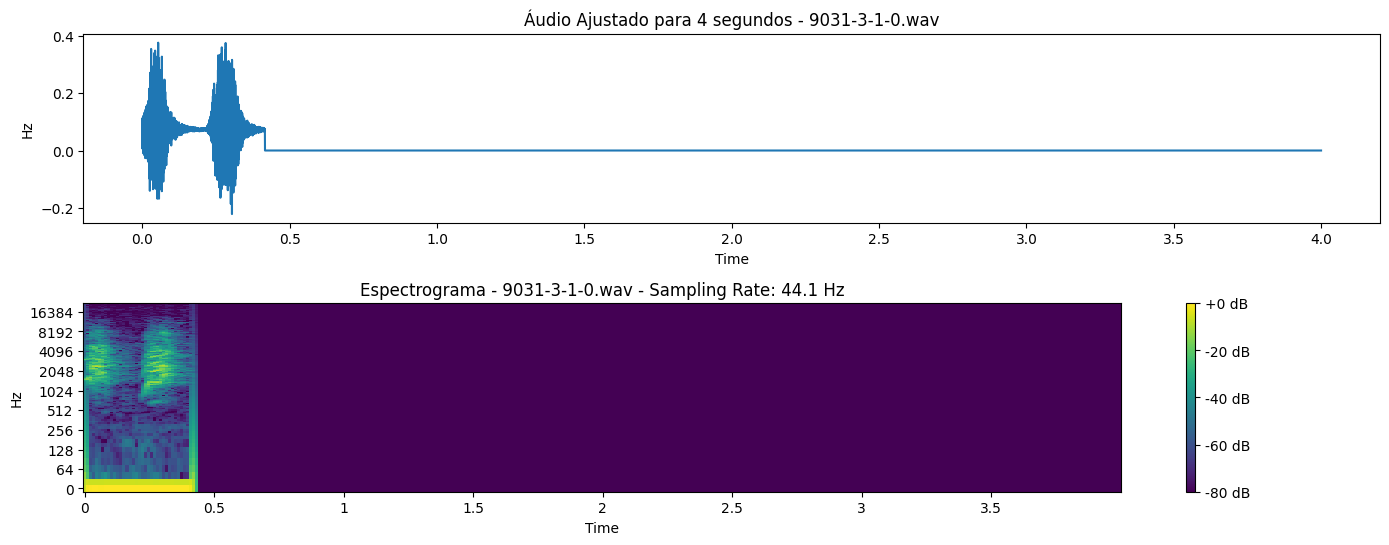

In [10]:
# Lista todos os arquivos na pasta e ordena por número de forma ascendente
audio_files = sorted([f for f in os.listdir(audio_folder) if f.endswith('.wav')], key=lambda x: int(''.join(filter(str.isdigit, x))) if any(c.isdigit() for c in x) else float('inf'))[:5]

dataset_path = 'C:/Users/zezam/OneDrive/Ambiente de Trabalho/trabalhoac2/TrabalhoACII/UrbanSound8K.csv'
dataset = pd.read_csv(dataset_path)


# Itera sobre os arquivos ordenados
for filename in audio_files:
    if filename.endswith('.wav'):  # Certifique-se de que são arquivos de áudio WAV ou outro formato suportado
        audio_path = os.path.join(audio_folder, filename)
        
        # Ajusta o áudio para 4 segundos
        y_adjusted, sr = adjust_audio_duration(audio_path, target_duration=4.0)
        
        # Obtém a classe do áudio a partir do dataset
        # classe_do_audio = dataset.loc[dataset['classID'] == filename, 'class'].values[0]
    
        # Calcula o espectrograma
        spectrogram = np.abs(librosa.stft(y_adjusted))

        # Exibe o áudio ajustado, a forma de onda do áudio e o espectrograma
        plt.figure(figsize=(14, 8))

        plt.subplot(3, 1, 2)
        plt.plot(np.linspace(0, len(y_adjusted) / sr, num=len(y_adjusted)), y_adjusted)
        plt.title('Áudio Ajustado para 4 segundos - {}'.format(filename))
        plt.xlabel('Time')
        plt.ylabel('Hz')
        
        plt.subplot(3, 1, 3)
        librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='log', x_axis='time', sr=sr, cmap='viridis')
        plt.title('Espectrograma - {} - Sampling Rate: {} Hz'.format(filename,sr/1000))
        plt.colorbar(format='%+2.0f dB')
    
        plt.tight_layout()
        plt.show()
        ipd.display(ipd.Audio(y_adjusted, rate=sr))

### Função para extração das features usando a biblioteca librosa

In [11]:
def extract_features(audio_path, target_duration=4.0):
    # Carrega o áudio e ajusta a duração
    y, sr = librosa.load(audio_path, duration=target_duration)
    hop_length = 512
    oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)

    # Extraia as características do áudio
    
    #Spectral feature list
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    poly_features = librosa.feature.poly_features(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    
    #Rhythm features
    
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
    fourier_tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
    

    return mfccs, chroma_stft, chroma_cqt, chroma_cens, melspectrogram, spectral_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness, spectral_rolloff, poly_features, tonnetz, zero_crossing_rate, rms, tempogram, fourier_tempogram

### Função que percorre todas as pastas com aufios de modo a fazer a extração das features

In [12]:
features_list = []
label_list = []
def process_data (base_dir):
    for folder in os.listdir(base_dir):
        fold_dir = os.path.join(base_dir, folder)
        if os.listdir(fold_dir):
            for filename in os.listdir(fold_dir):
                file_path = os.path.join(fold_dir, filename)
                if filename.endswith('.wav'):
                    label = filename
                    features = extract_features(file_path)
                    features_list.append(features)
                    label_list.append(label)
    df=pd.DataFrame(features_list)
    df['Label'] = label_list
    
    return df

base_dir = 'C:/Users/zezam/OneDrive/Ambiente de Trabalho/trabalhoac2/TrabalhoACII/audio'
urbansounds_df = process_data(base_dir)

print(urbansounds_df.head())


C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=173
  warnings.warn(
C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=566
  warnings.warn(
C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=71
  warnings.warn(
C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=900
  warnings.warn(
C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=113
  warnings.warn(
C:\Users\zezam\OneDrive\Ambie

                                                   0  \
0  [[-525.06586, -519.55695, -518.64276, -518.897...   
1  [[-524.8159, -521.7542, -520.1264, -521.55524,...   
2  [[-133.84369, -161.87689, -246.68976, -244.979...   
3  [[-268.53568, -244.676, -250.90111, -222.67284...   
4  [[-145.07484, -90.33111, -93.73102, -105.46188...   

                                                   1  \
0  [[0.38835523, 0.19924103, 0.10843163, 0.360491...   
1  [[0.72550815, 0.30868328, 0.28462943, 0.520442...   
2  [[0.40828466, 1.0, 1.0, 1.0, 1.0, 0.22074267, ...   
3  [[0.20954302, 0.16363654, 0.2376503, 0.3907682...   
4  [[0.8159178, 0.7117343, 0.49387282, 0.8094396,...   

                                                   2  \
0  [[0.40158358, 0.41719353, 0.42631456, 0.410016...   
1  [[0.71687794, 0.73089874, 0.7095322, 0.6755727...   
2  [[0.54607576, 1.0, 1.0, 1.0, 1.0, 0.50637615, ...   
3  [[0.6150177, 0.65557694, 0.6134635, 0.8040387,...   
4  [[0.66915184, 0.6227027, 0.655127, 0.853980

In [13]:
for filename in audio_files:
    audio_path = os.path.join(audio_folder, filename)
    
    # Extraia as características
    mfccs, chroma_stft, chroma_cqt, chroma_cens, melspectrogram, spectral_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness, spectral_rolloff, poly_features, tonnetz, zero_crossing_rate, rms, tempogram, fourier_tempogram= extract_features(audio_path)

    # Exiba ou armazene as características conforme necessário
    print(f"Features do arquivo {filename}:")
    print("\n")
    print("Chroma STFT:", chroma_stft.shape)
    print("Chroma CQT:", chroma_cqt.shape)
    print("Chroma CENS:", chroma_cens.shape)
    print("Melspectrogram:", melspectrogram.shape)
    print("Spectral Centroid:", spectral_centroid.shape)
    print("Spectral Bandwidth:", spectral_bandwidth.shape)
    print("Spectral Contrast:", spectral_contrast.shape)
    print("Spectral Flatness:", spectral_flatness.shape)
    print("Spectral Rolloff:", spectral_rolloff.shape)
    print("Poly Features:", poly_features.shape)
    print("Tempogram:", tempogram.shape)
    print("Fourier Tempogram:", fourier_tempogram.shape)
    print("Tonnetz:", tonnetz.shape)
    print("Zero Crossing Rate:", zero_crossing_rate.shape)
    print("RMS:", rms.shape)
    print("\n")
    print("MFCCs:", mfccs.shape)
    print("\n")    
    print(mfccs)
    print("\n")
    mfccs_scaled = np.mean(mfccs.T,axis=0)
    print("MFCCs scaled:")
    print("\n")    
    print(mfccs_scaled)
    print("\n")

C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=776
  warnings.warn(
C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=97
  warnings.warn(


Features do arquivo 7061-6-0-0.wav:


Chroma STFT: (12, 97)
Chroma CQT: (12, 97)
Chroma CENS: (12, 97)
Melspectrogram: (128, 97)
Spectral Centroid: (1, 97)
Spectral Bandwidth: (1, 97)
Spectral Contrast: (7, 97)
Spectral Flatness: (1, 97)
Spectral Rolloff: (1, 97)
Poly Features: (2, 97)
Tempogram: (384, 97)
Fourier Tempogram: (193, 98)
Tonnetz: (6, 97)
Zero Crossing Rate: (1, 97)
RMS: (1, 97)


MFCCs: (20, 97)


[[-1.27213120e+02  8.04792309e+00  1.60044117e+01 ... -5.69353333e+02
  -5.91727539e+02 -6.10657837e+02]
 [ 3.00206680e+01  2.29403458e+01  1.06696825e+01 ...  4.30511932e+01
   2.58880424e+01  1.28297863e+01]
 [-2.53601575e+00 -1.12524347e+01 -1.42598028e+01 ... -1.11037216e+01
  -7.55062675e+00  2.01516181e-01]
 ...
 [ 3.67040730e+00  3.25294614e+00  2.76236391e+00 ... -7.68891990e-01
  -1.40338778e+00  2.68907499e+00]
 [-3.40934181e+00 -3.22118092e+00 -8.71091425e-01 ... -5.17491341e+00
  -3.43502522e+00  2.55970526e+00]
 [ 2.74705935e+00  4.27691317e+00  6.04537868e+00 ...  

C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=173
  warnings.warn(


Features do arquivo 7383-3-0-0.wav:


Chroma STFT: (12, 173)
Chroma CQT: (12, 173)
Chroma CENS: (12, 173)
Melspectrogram: (128, 173)
Spectral Centroid: (1, 173)
Spectral Bandwidth: (1, 173)
Spectral Contrast: (7, 173)
Spectral Flatness: (1, 173)
Spectral Rolloff: (1, 173)
Poly Features: (2, 173)
Tempogram: (384, 173)
Fourier Tempogram: (193, 174)
Tonnetz: (6, 173)
Zero Crossing Rate: (1, 173)
RMS: (1, 173)


MFCCs: (20, 173)


[[-570.4169     -505.80988    -446.61017    ... -481.28598
  -472.45932    -464.25366   ]
 [  32.36013      93.75862     142.70895    ...  104.03226
   114.74982     116.83809   ]
 [  26.08899      34.996727     40.650406   ...   11.899885
    17.13873      13.889361  ]
 ...
 [  -2.9022932    -2.1251905     2.1795526  ...   -1.3711911
    -5.188534     -8.96597   ]
 [  -2.8709826    -4.4176645     0.62707675 ...    1.7903719
     1.2488769     0.78350735]
 [  -1.8310378    -3.5530314     2.2060456  ...    2.5138156
     3.5610366     6.4840384 ]]


MFCCs scaled:


C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=574
  warnings.warn(
C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=287
  warnings.warn(
C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=144
  warnings.warn(


Features do arquivo 9031-3-1-0.wav:


Chroma STFT: (12, 18)
Chroma CQT: (12, 18)
Chroma CENS: (12, 18)
Melspectrogram: (128, 18)
Spectral Centroid: (1, 18)
Spectral Bandwidth: (1, 18)
Spectral Contrast: (7, 18)
Spectral Flatness: (1, 18)
Spectral Rolloff: (1, 18)
Poly Features: (2, 18)
Tempogram: (384, 18)
Fourier Tempogram: (193, 19)
Tonnetz: (6, 18)
Zero Crossing Rate: (1, 18)
RMS: (1, 18)


MFCCs: (20, 18)


[[-1.90951935e+02 -1.48004837e+02 -1.73055405e+02 -1.89546646e+02
  -2.41862106e+02 -3.16823334e+02 -3.62320740e+02 -3.91547607e+02
  -4.16742676e+02 -3.23197784e+02 -2.16191330e+02 -1.76870850e+02
  -1.67631348e+02 -1.71604004e+02 -2.09453751e+02 -2.79991669e+02
  -3.49121918e+02 -3.00346008e+02]
 [ 5.67073669e+01 -2.99244547e+00 -8.17406616e+01 -8.05121918e+01
  -5.30118027e+01 -2.93255310e+01 -5.39269352e+00  1.37198925e+01
   2.73953362e+01  3.84288635e+01 -6.89387321e+00 -4.05204773e+01
  -6.58890839e+01 -8.21697922e+01 -8.30285492e+01 -6.02521935e+01
  -3.61116257e+01  7.6

C:\Users\zezam\OneDrive\Ambiente de Trabalho\trabalhoac2\venv\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=18
  warnings.warn(


# Data pre-processing e implementação das neural networks


#### Standard scalling dos dados de treino e criação dos training e test sets

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming urbansounds_df is your feature matrix and label_list is your target variable

# Separate numeric and non-numeric columns
numeric_columns = urbansounds_df.select_dtypes(include=[np.number]).columns
non_numeric_columns = urbansounds_df.select_dtypes(exclude=[np.number]).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(urbansounds_df, label_list, test_size=0.2, random_state=42)

# Convert numeric columns to float
X_train[numeric_columns] = X_train[numeric_columns].astype(float)
X_test[numeric_columns] = X_test[numeric_columns].astype(float)

# Standard scaling only on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])

# Apply the same scaling parameters to the testing set
X_test_scaled = scaler.transform(X_test[numeric_columns])


ValueError: at least one array or dtype is required

#### Implementação de rede neuronal MLP usando o tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming X_train_scaled and y_train are your training sets after scaling and splitting
# Also, assuming you have an appropriate number of neurons in the hidden layers and choose an appropriate activation function

# Create the model
model = Sequential()

# Add the input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add one or more hidden layers
model.add(Dense(units=32, activation='relu'))

# Add the output layer (the number of units should match the number of classes in your classification problem)
# Assuming num_classes is the number of classes in your problem
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Assuming y_train is one-hot encoded (using, for example, to_categorical from Keras)
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)
